In [184]:
import numpy as np
import pandas as pd
import os
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [145]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df = df.dropna()

In [146]:
df = df.drop('ID', axis = 1)

In [147]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [148]:
df['default payment next month'] = df['default payment next month'].replace(to_replace=0, value="Paid")
df['default payment next month'] = df['default payment next month'].replace(to_replace=1, value="Default")
target_names = ["Default", "Paid"]

# Feature Scaling Limit Balance

In [149]:
df['LIMIT_BAL'] = df['LIMIT_BAL']/1000

In [150]:
#makes the percentage columns I was talking about
def percent_maker(df):
    for i in range(1,7):
        df[('pct_paid_{}'.format(i))] = df[('PAY_AMT{}'.format(i))] / df[('BILL_AMT{}'.format(i))]

percent_maker(df)

#replaces null and infinite values
df = df.replace({None:0, np.inf:1})

#new X features for modeling...
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','pct_paid_1', 'pct_paid_2', 'pct_paid_3',
       'pct_paid_4', 'pct_paid_5', 'pct_paid_6']]

target = df['default payment next month']

In [151]:
target.value_counts()

Paid       23364
Default     6636
Name: default payment next month, dtype: int64

In [262]:
target

0        Default
1        Default
2           Paid
3           Paid
4           Paid
5           Paid
6           Paid
7           Paid
8           Paid
9           Paid
10          Paid
11          Paid
12          Paid
13       Default
14          Paid
15          Paid
16       Default
17          Paid
18          Paid
19          Paid
20          Paid
21       Default
22       Default
23       Default
24          Paid
25          Paid
26       Default
27          Paid
28          Paid
29          Paid
          ...   
29970       Paid
29971       Paid
29972       Paid
29973    Default
29974    Default
29975       Paid
29976    Default
29977       Paid
29978       Paid
29979       Paid
29980       Paid
29981       Paid
29982    Default
29983       Paid
29984       Paid
29985       Paid
29986       Paid
29987       Paid
29988       Paid
29989       Paid
29990       Paid
29991    Default
29992       Paid
29993       Paid
29994    Default
29995       Paid
29996       Paid
29997    Defau

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)

In [153]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pct_paid_1,pct_paid_2,pct_paid_3,pct_paid_4,pct_paid_5,pct_paid_6
0,20.0,2.0,2.0,1.0,24.0,0.000000,0.222115,0.000000,0.000000,0.000000,0.000000
1,120.0,2.0,2.0,2.0,26.0,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,90.0,2.0,2.0,2.0,34.0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,50.0,2.0,2.0,1.0,37.0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,50.0,1.0,2.0,1.0,57.0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492


In [185]:
modellist = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

In [186]:
for model in modellist:
    modelfit = model.fit(X_train, y_train)
    modelypred = modelfit.predict(X_test)
    print str(model).split("(")[0] + ": " + str(round(accuracy_score(y_test, modelypred),3))
    print confusion_matrix(y_test, model.predict(X_test))

KNeighborsClassifier: 0.738
[[ 279 1681]
 [ 674 6366]]
LogisticRegression: 0.782
[[   0 1960]
 [   0 7040]]
GaussianNB: 0.234
[[1931   29]
 [6865  175]]
DecisionTreeClassifier: 0.684
[[ 628 1332]
 [1508 5532]]
RandomForestClassifier: 0.75
[[ 524 1436]
 [ 810 6230]]
GradientBoostingClassifier: 0.782
[[ 177 1783]
 [ 176 6864]]


# Feature Selection

In [263]:
def allfeature(model,name, color):
#     arr = []
    X_train, X_test, y_train, y_test = train_test_split(X, y_test2, test_size = 0.3, random_state = 42)
    modelfit = model.fit(X_train, y_train)
#     modely_pred = modelfit.predict(X_test)
    pred_proba = modelfit.predict_proba(X_test)
#     arr.append(round(accuracy_score(y_test, modely_pred),3))
#     arr.append(round(recall_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label= "Default"),3))
#     arr.append(round(precision_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label = "Default"),3))
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1], pos_label = "Default")
#     plt.figure(figsize=(20,20))
#     plt.plot(precision, recall, color=color, label='Precision-Recall curve: '+ name)
    tplist, fplist, costlist, thresh = allfeaturecost(model)
    plt.plot(thresh, costlist, color=color, label='Precision-Recall curve: '+ name)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall curve')
    plt.legend(loc="upper right")
    print precision, recall, thresholds




In [228]:
y_test2 = np.array(y_test)


In [255]:
def cost(tp, fp):
    letter = 1
    notdef = 100
    probnotdef = 0.02
    lossfalsep = 200
    probleave = 0.01
    totcost = letter * (fp + tp) - notdef * probnotdef * tp + lossfalsep * probleave * fp
    return totcost

In [261]:
model.classes_

array(['Default', 'Paid'], dtype=object)

In [271]:
target = target.replace("Default", 1).replace("Paid", 0)

In [272]:
def allfeaturecost(model):
#     arr = []
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
    modelfit = model.fit(X_train, y_train)
#     modely_pred = modelfit.predict(X_test)
    pred_proba = modelfit.predict_proba(X_test)
#     arr.append(round(accuracy_score(y_test, modely_pred),3))
#     arr.append(round(recall_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label= "Default"),3))
#     arr.append(round(precision_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label = "Default"),3))
    thresh = [0.2, 0.4, .5, 0.6, 0.8]
    fplist = []
    tplist = []
    costlist = []
    
    for item in range(len(thresh)):
        tp = 0
        fp = 0
        for elem in range(len(pred_proba)):
            if pred_proba[elem][1]>=thresh[item] and y_test2[elem] == 1:
                tp += 1
            elif pred_proba[elem][1] >=thresh[item] and y_test2[elem] == 0:
                fp += 1
            else:
                pass
        tplist.append(tp)
        fplist.append(fp)
        costlist.append(cost(tp,fp))
        
    
    return tplist, fplist, costlist, thresh

In [273]:
print allfeaturecost(KNeighborsClassifier())

([1459, 758, 279, 279, 59], [4551, 2075, 674, 674, 95], [12194.0, 5467.0, 1743.0, 1743.0, 226.0], [0.2, 0.4, 0.5, 0.6, 0.8])


In [212]:
y_test = y_test.replace("Paid", 0).replace("Default", 1)

In [239]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
8511     0
5148     1
7790     0
11311    0
19043    0
10784    0
22246    0
3268     0
15947    1
14977    0
14474    0
28694    0
14054    0
26545    0
14980    1
17636    0
3931     1
8387     0
8028     0
9482     0
22572    0
15107    0
3673     1
21388    0
5937     0
        ..
26513    1
8410     1
18365    0
9480     1
9152     0
3728     1
2966     0
10428    0
14545    0
23760    0
15204    0
16778    0
19854    0
10664    0
16264    1
29769    0
26075    0
17931    1
9441     0
16072    0
23919    0
17137    1
19863    1
26750    0
14774    0
3941     1
17854    0
95       0
6279     0
26428    0
Name: default payment next month, dtype: int64

In [201]:
someting = allfeature(KNeighborsClassifier())

In [204]:
someting[0][1]

0.59999999999999998

In [ ]:
for model,name,color in zip(modellist,names,colors_list):
    print model,name
    print allfeature(model,name,color)

In [181]:
# def allfeature(model):
# #     arr = []
#     X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
#     modelfit = model.fit(X_train, y_train)
#     modely_pred = modelfit.predict(X_test)
#     pred_proba = modelfit.predict_proba(X_test)
#     dfnew = pd.DataFrame(pred_proba)
#     return dfnew
    

In [158]:
allfeature(KNeighborsClassifier()).head()

NameError: global name 'arr' is not defined

In [ ]:
y_test.value_counts()

In [194]:
# [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), ]
names = ['knn','log','nb','tree','rf', "gb"]
colors_list = ["green", "blue", "purple", "red", "orange", "yellow"]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') knn
[ 0.21777778  0.21729934  0.21489939  0.20889773  0.19490838  0.16755853
  1.        ] [ 1.          0.99591837  0.96989796  0.85765306  0.61326531  0.25561224
  0.        ] [ 0.   0.2  0.4  0.6  0.8  1. ]
None
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) log
[ 0.21789883  0.21781187  0.2177249  ...,  0.5         0.          1.        ] [  1.00000000e+00   9.99489796e-01   9.98979592e-01 ...,   5.10204082e-04
   0.00000000e+00   0.00000000e+00] [ 0.59954895  0.60001971  0.60071793 ...,  0.96634049  0.96647397
  0.96967935]
None
GaussianNB(priors=None) nb
[ 0.21780198  0.21771505  0.21773925 ...,  0.09375 

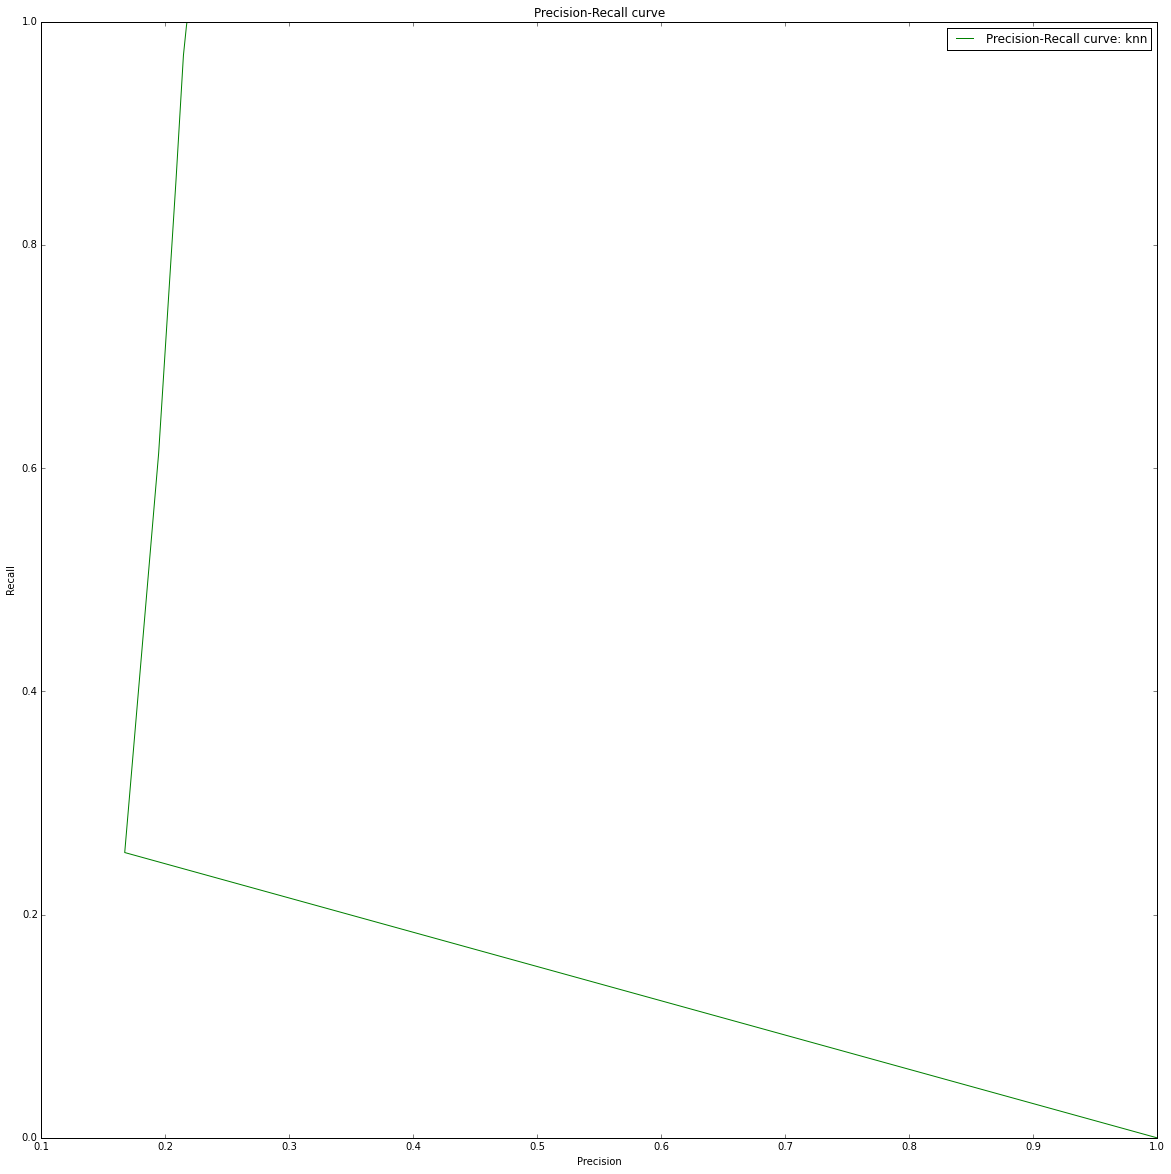

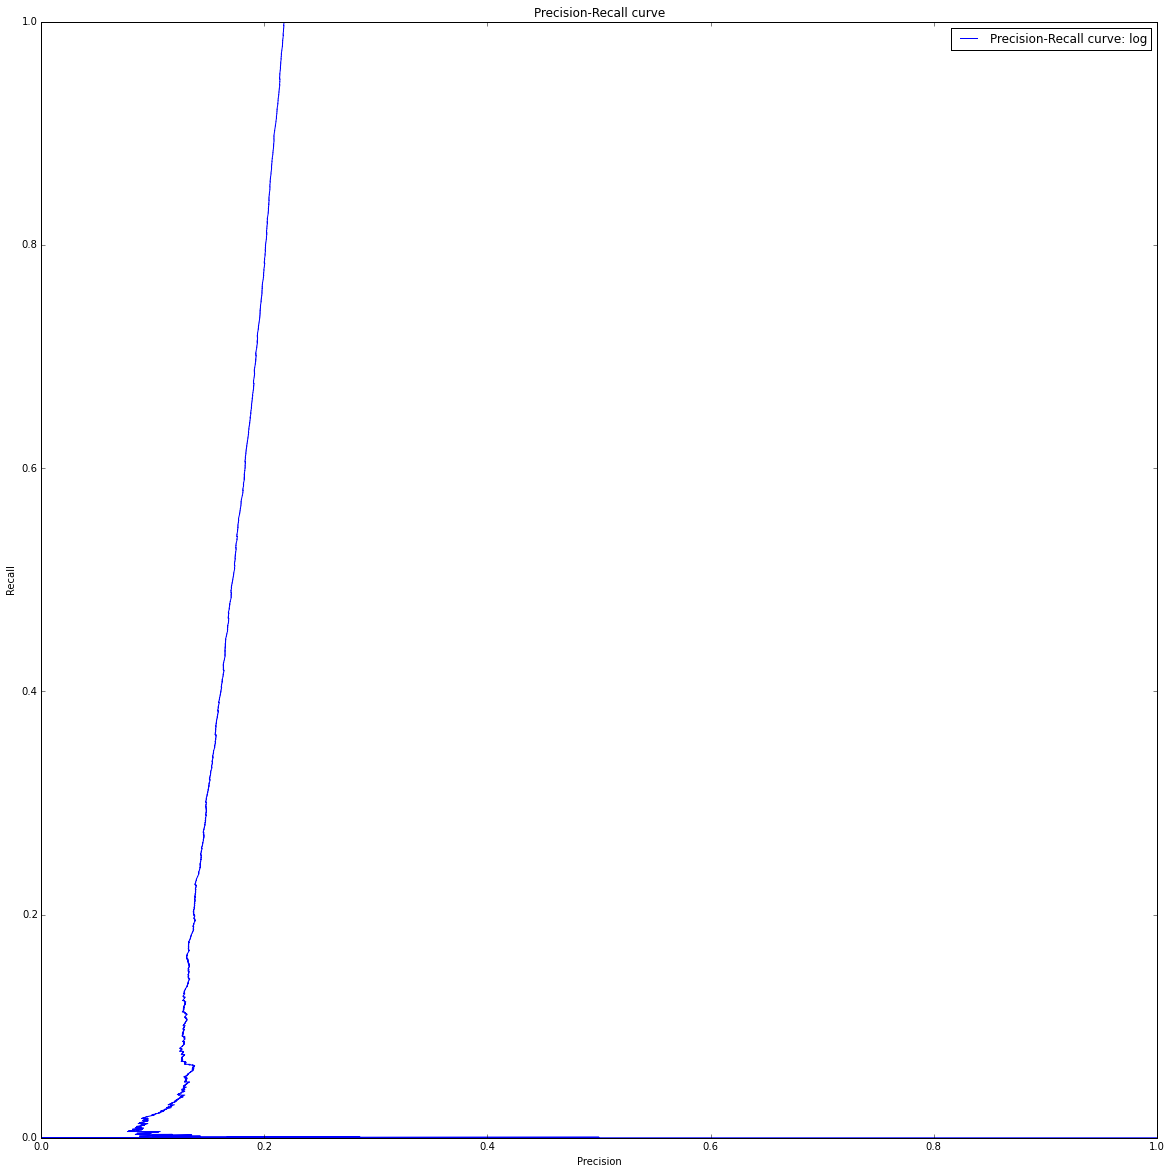

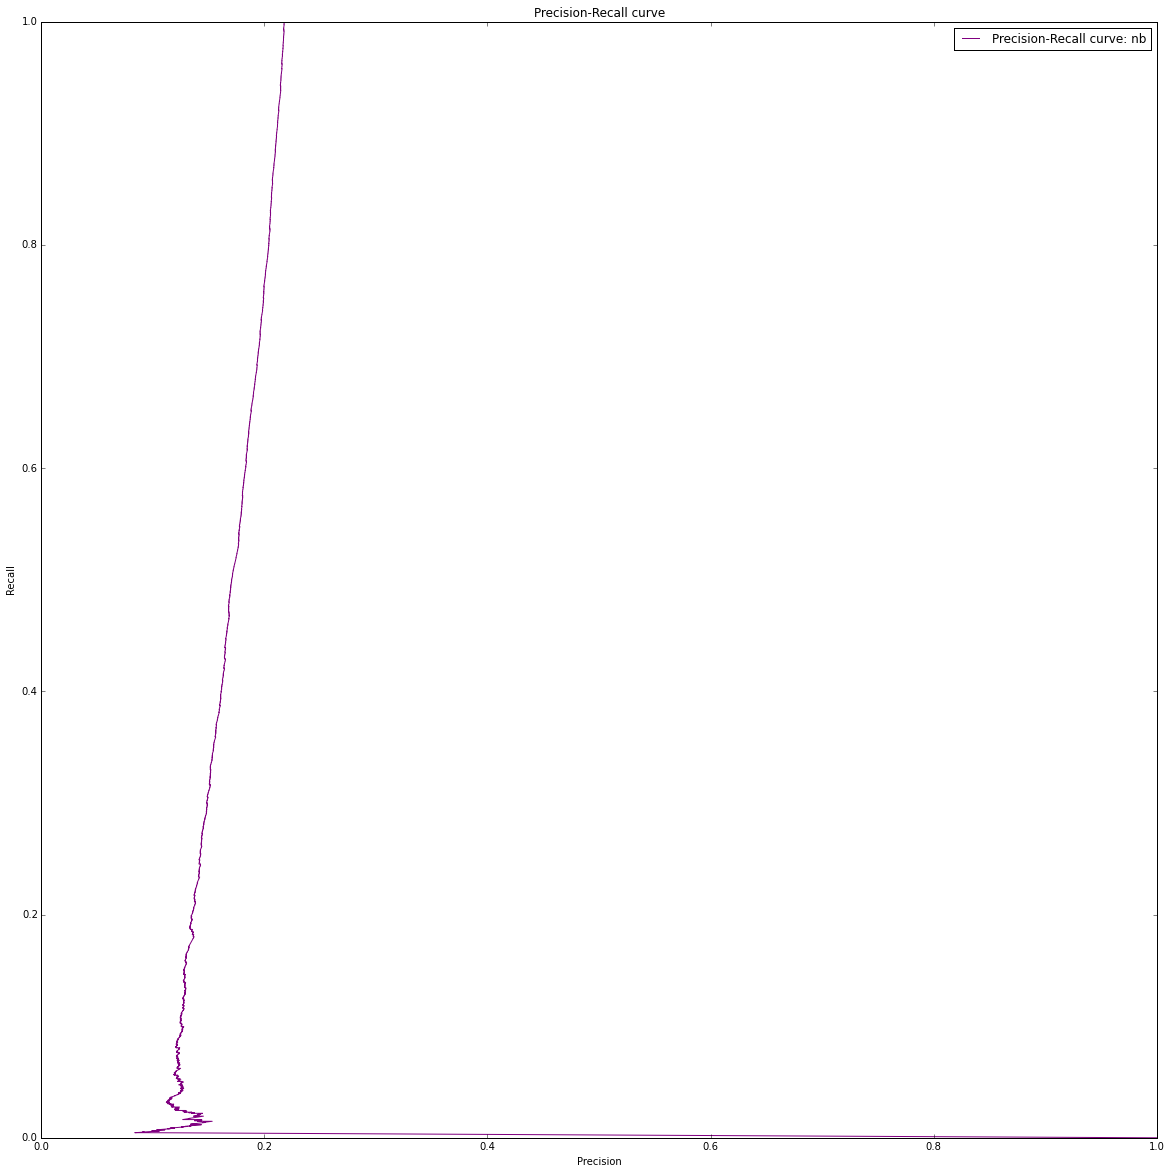

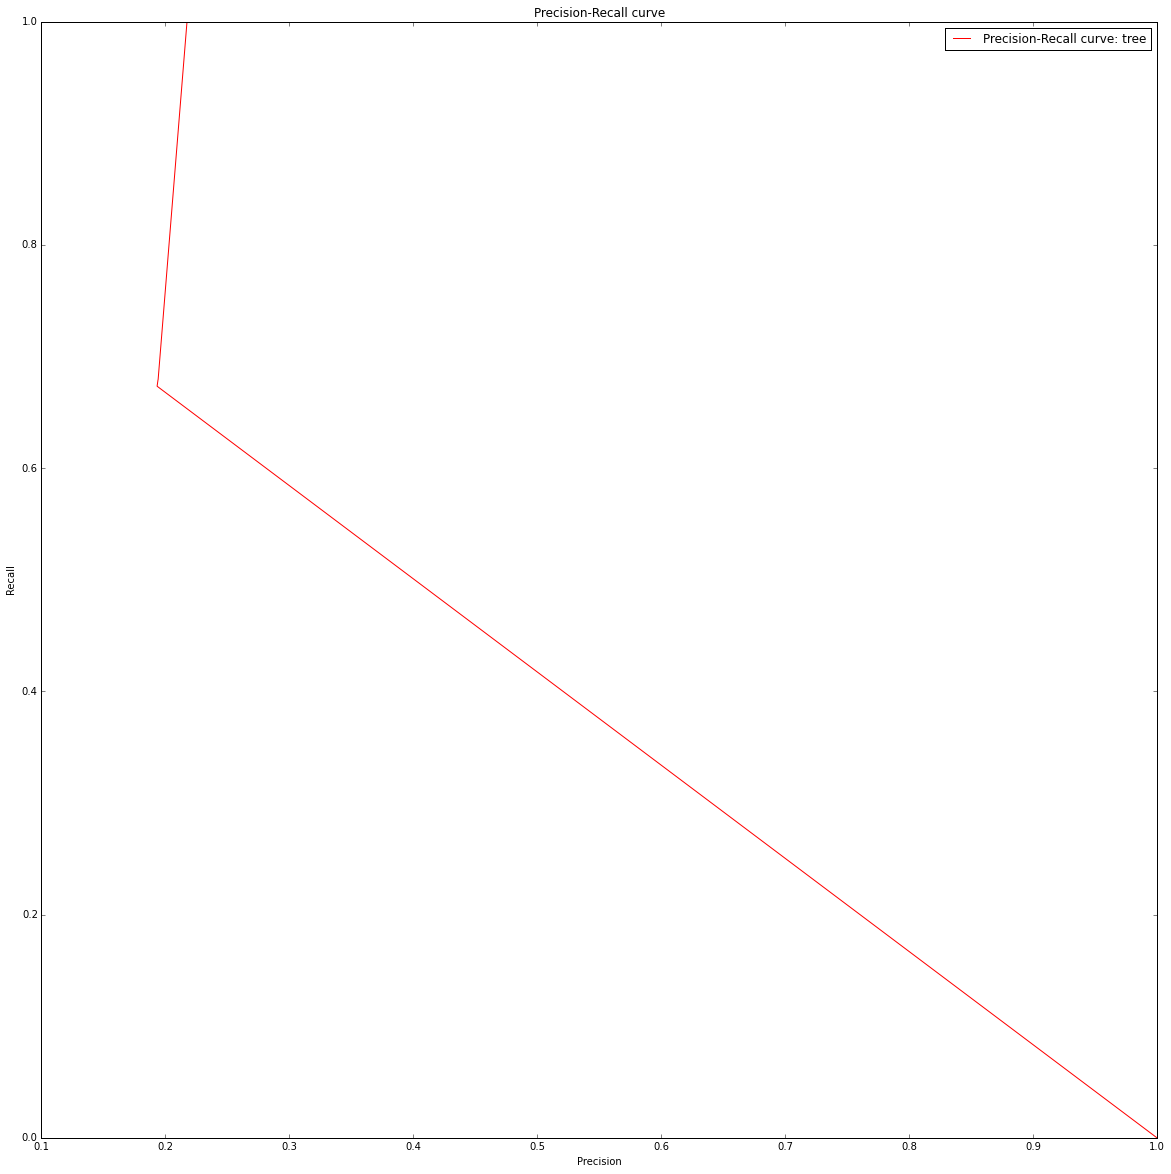

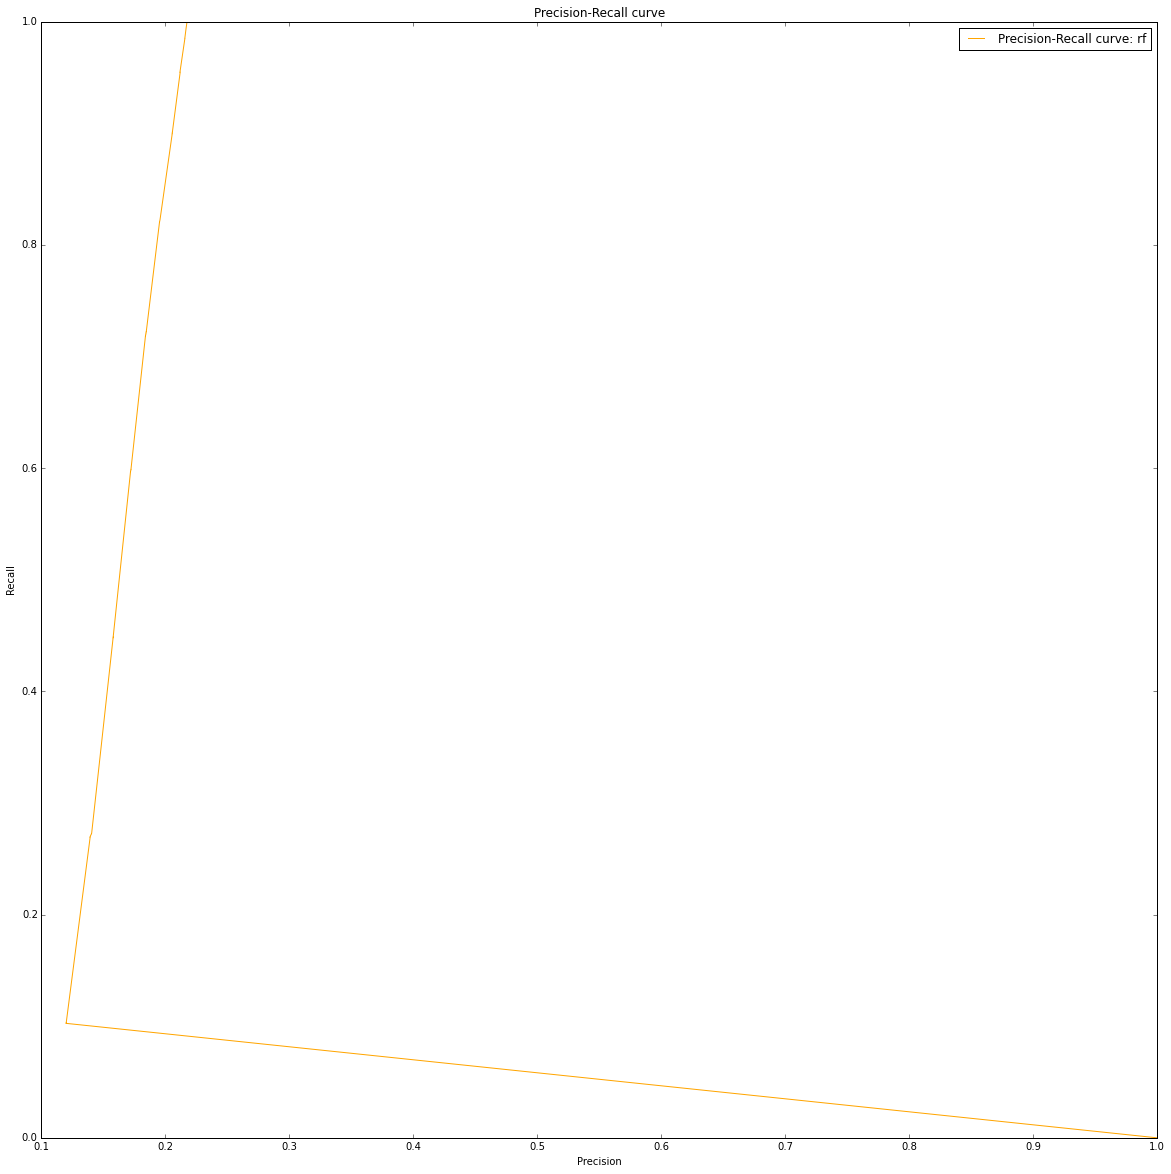

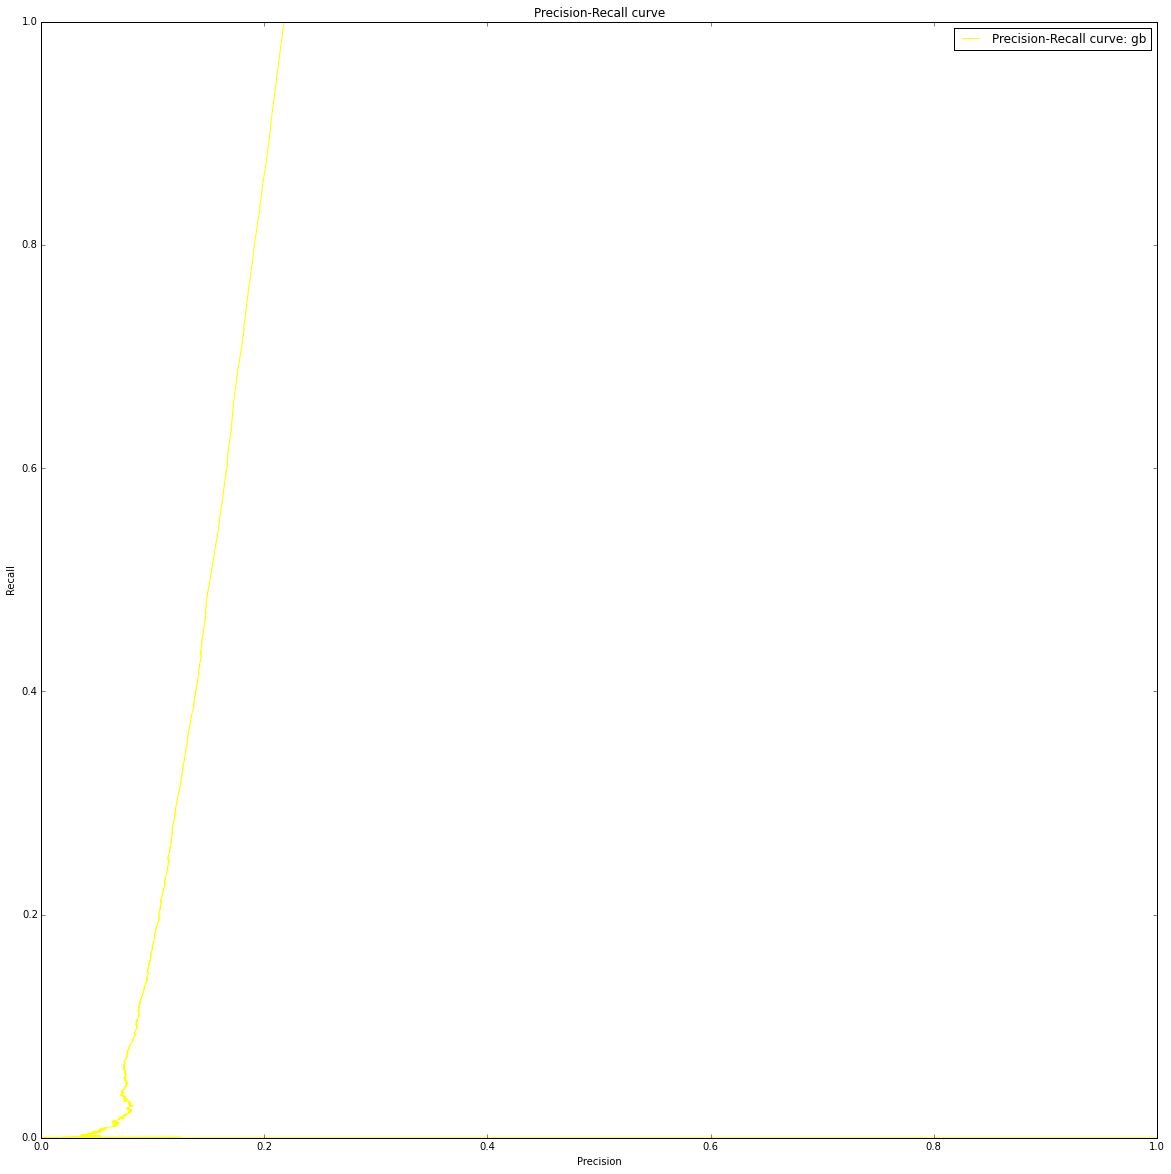

In [195]:
for model,name,color in zip(modellist,names,colors_list):
    print model,name
    print allfeature(model,name,color)

#     print confusion_matrix(y_test, model.predict(X_test))
    

In [ ]:
def onefeature(model, name):
    arr = []
    X = df[[name]]
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
    modelfit = model.fit(X_train, y_train)
    modely_pred = modelfit.predict(X_test)
    arr.append(round(accuracy_score(y_test, modely_pred),3))
    arr.append(round(recall_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label= "Default"),3))
    arr.append(round(precision_score(y_test, modely_pred, labels = ["Paid", "Default"], pos_label = "Default"),3))
    return arr

In [ ]:
colnames = df.columns.tolist()
colnames.pop()

In [ ]:
onemodel = modellist[1]

In [ ]:
for title in colnames:
    print title
    print onefeature(onemodel, title)